# Dataplot thesis Tom
*Cyril Rommens <br> 28-10-2024*

### Summary
Use the excel file to directly import the waterdepth, plant category and abundancy. Then plot as 3d histogram and manipulate presentation to visualize waterdepth and growth relationship.


**Import libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

**Import the data as datafdrame**

In [1]:
# Read the CSV file with the correct delimiter
df = pd.read_csv("VegRel3m.csv", delimiter=';', header=0)

# Select columns 3 to 9 (which correspond to the indices 3 to 8)
df_plants = df.iloc[:, 3:10]

**Print the resulting dataframe**

In [2]:
# Display the new DataFrame
df_plants

,ceratophyllum demersum,algae bloom,nasturtium,sparghanium emersum,agrostis/phalaris,stachys,water depth
0,0.00,0.00,10.59,4.28,71.22,13.88,0
1,0.01,0.00,7.66,6.57,58.66,26.98,0
2,0.31,0.00,4.05,2.74,75.27,16.66,20
3,1.59,0.00,5.42,3.89,68.69,17.16,2
4,1.30,0.00,4.08,4.91,66.61,20.15,1
5,2.38,0.00,2.28,3.29,75.49,12.48,15
6,0.39,0.00,4.52,2.36,68.93,21.38,0
7,2.09,0.00,3.32,4.47,73.88,11.22,1
8,0.30,0.65,5.87,4.67,60.68,27.32,0
9,0.15,0.00,2.66,29.15,55.20,12.51,1


**Plot the waterdepth against the plantgrowth**

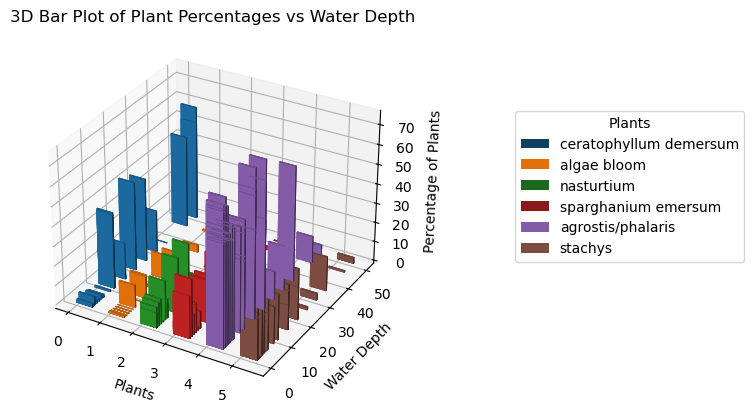

In [19]:
# Extract water depth and plant percentages
water_depth = df_plants.iloc[:, -1]  # Last column for water depth
plant_data = df_plants.iloc[:, :-1]  # All columns except the last for plant percentages

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the x-axis as the indices (names of plants)
x_labels = plant_data.columns

# Create a meshgrid for the plotting
y = water_depth.values
z = np.zeros_like(y)  # Base of the bars

# Set width and depth for the bars
width = 0.5
depth = 0.5

# Iterate over each plant to plot its percentage as bars
for i in range(len(x_labels)):
    ax.bar3d(
        [i] * len(y),   # x position
        y,              # y position (water depth)
        z,              # z position (base of bars)
        width,          # width of the bars
        depth,          # depth of the bars
        plant_data.iloc[:, i],  # height of the bars (percentage of plants)
        shade=True      # shading option
    )

# Set labels
ax.set_ylabel('Water Depth')
ax.set_xlabel('Plants')
ax.set_zlabel('Percentage of Plants')
ax.set_xticks(np.arange(len(x_labels)))  # Set x-ticks to be the indices of plants
#ax.set_xticklabels(x_labels)  # Set x-tick labels to the plant names
ax.legend(x_labels, loc='upper left', bbox_to_anchor=(1.3, 0.8), title='Plants')

plt.title('3D Bar Plot of Plant Percentages vs Water Depth')
plt.show()


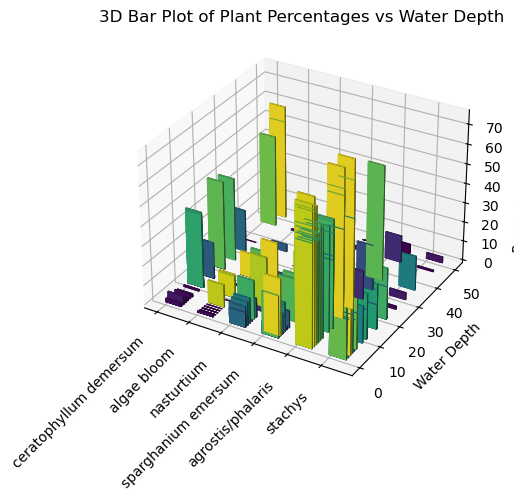

In [24]:
# Extract water depth and plant percentages
water_depth = df_plants.iloc[:, -1].values  # Last column for water depth
plant_data = df_plants.iloc[:, :-1]  # Keep as DataFrame for column names

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the x-axis as the indices (names of plants)
x_labels = plant_data.columns  # Keep as DataFrame to access columns

# Create a meshgrid for the plotting
y = water_depth
z = np.zeros_like(y)  # Base of the bars

# Set width and depth for the bars
width = 0.5
depth = 0.5

# Create a colormap
cmap = plt.cm.viridis  # You can choose other colormaps as needed

# Iterate over each plant to plot its percentage as bars
for i in range(len(x_labels)):
    # Get the height for the current plant
    heights = plant_data.iloc[:, i].values  # Extract heights as a NumPy array
    
    # Normalize heights to the range [0, 1] for coloring
    norm_heights = (heights - np.min(heights)) / (np.max(heights) - np.min(heights))
    
    # Create a color array based on normalized heights
    colors = cmap(norm_heights)  # Map heights to colors using the colormap
    
    # Plot each bar with the corresponding color
    ax.bar3d(
        [i] * len(y),   # x position
        y,              # y position (water depth)
        z,              # z position (base of bars)
        width,          # width of the bars
        depth,          # depth of the bars
        heights,        # height of the bars (percentage of plants)
        color=colors,   # Color based on percentage
        shade=True      # Shading option
    )

# Set labels
ax.set_ylabel('Water Depth')
#ax.set_xlabel('Plants')
ax.set_zlabel('Percentage of Plants')
ax.set_xticks(np.arange(len(x_labels)))  # Set x-ticks to be the indices of plants
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Set x-tick labels to the plant names

plt.title('3D Bar Plot of Plant Percentages vs Water Depth')
plt.show()


In [37]:
df_plants

,ceratophyllum demersum,algae bloom,nasturtium,sparghanium emersum,agrostis/phalaris,stachys,water depth
0,0.00,0.00,10.59,4.28,71.22,13.88,0
1,0.01,0.00,7.66,6.57,58.66,26.98,0
2,0.31,0.00,4.05,2.74,75.27,16.66,20
3,1.59,0.00,5.42,3.89,68.69,17.16,2
4,1.30,0.00,4.08,4.91,66.61,20.15,1
5,2.38,0.00,2.28,3.29,75.49,12.48,15
6,0.39,0.00,4.52,2.36,68.93,21.38,0
7,2.09,0.00,3.32,4.47,73.88,11.22,1
8,0.30,0.65,5.87,4.67,60.68,27.32,0
9,0.15,0.00,2.66,29.15,55.20,12.51,1


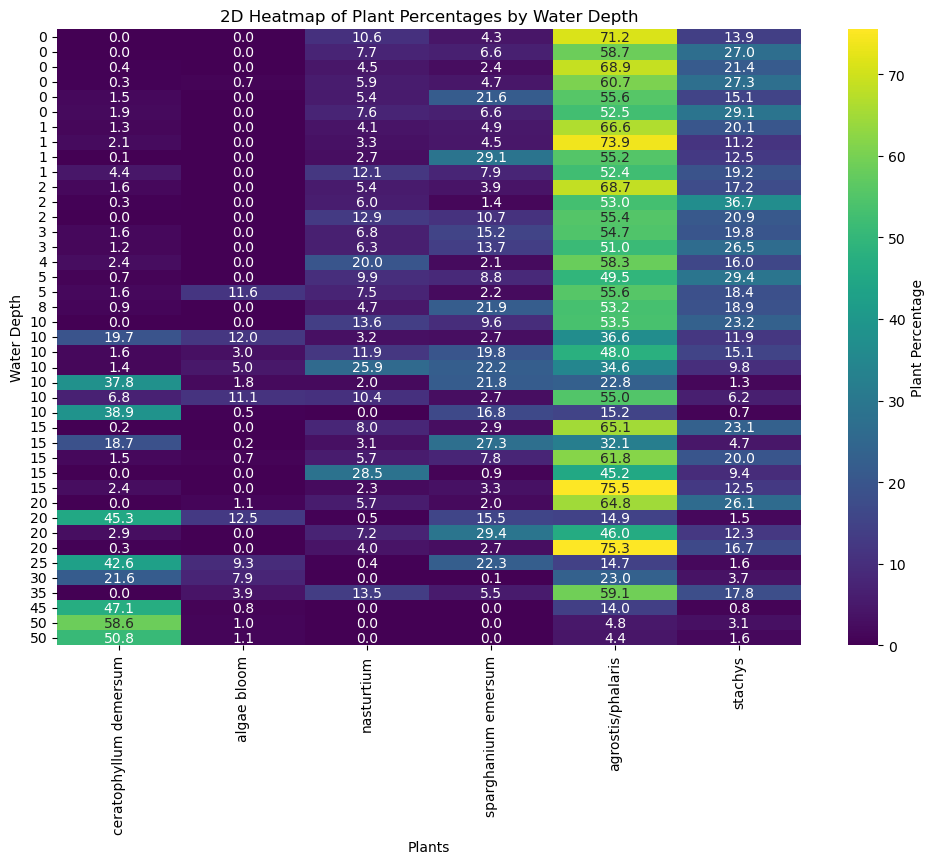

In [44]:
# Prepare data for the heatmap
heatmap_data = df_plants.iloc[:, :-1]  # Exclude the last column (water depth)
heatmap_data['water depth'] = df_plants['water depth']  # Add water depth as a new column

# Pivot the data to have water depth as index and sort it
heatmap_data = heatmap_data.set_index('water depth').sort_index()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.1f', cbar_kws={'label': 'Plant Percentage'})

# Set labels
plt.xlabel('Plants')
plt.ylabel('Water Depth')
plt.title('2D Heatmap of Plant Percentages by Water Depth')

plt.show()


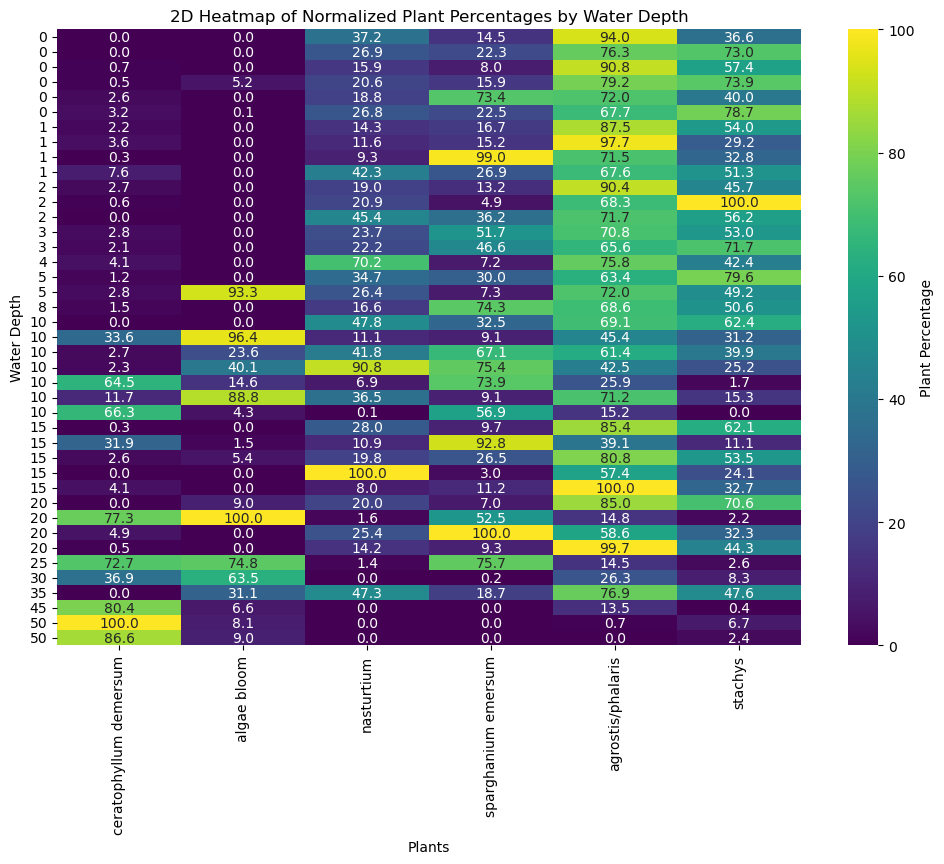

In [46]:
# Normalize the plant percentage columns to range 0-100
normalized_data = df_plants.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()) * 100)

# Prepare data for the heatmap
normalized_data['water depth'] = df_plants['water depth']  # Add water depth as a new column

# Pivot the data to have water depth as index and sort it
heatmap_data = normalized_data.set_index('water depth').sort_index()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.1f', cbar_kws={'label': 'Plant Percentage'})

# Set labels
plt.xlabel('Plants')
plt.ylabel('Water Depth')
plt.title('2D Heatmap of Normalized Plant Percentages by Water Depth')

plt.show()
